# Proyek Analisis Data: Air Quality
- **Nama:** Muhammad Bugi Satrio Marandhany
- **Email:** muhbugisatrio@gmail.com
- **ID Dicoding:** bugi-satrio

## Menentukan Pertanyaan Bisnis

- Dimana tempat dengan kualitas udara
  terbaik dan terburuk ?
- Bagaimana Kondisi kualitas udara dari tahun ke
  tahun ?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

## Data Wrangling

### Gathering Data

In [3]:
autizhongxin_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
dingling_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")
dongsi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
guanyuan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
gucheng_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")
huairou_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
shunyi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
tiantan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
wanliu_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
wanshouxigong_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

datasets = {
    "Aotizhongxin": autizhongxin_df,
    "Changping": changping_df,
    "Dingling": dingling_df,
    "Dongsi": dongsi_df,
    "Guanyuan": guanyuan_df,
    "Gucheng": gucheng_df,
    "Huairou": huairou_df,
    "Nongzhanguan": nongzhanguan_df,
    "Shunyi": shunyi_df,
    "Tiantan": tiantan_df,
    "Wanliu": wanliu_df,
    "Wanshouxigong": wanshouxigong_df,
}


df_final = pd.concat(datasets.values(), ignore_index=True)

**Insight:**
- berikut adalah dataset berisi data
  kualitas udara di beberapa lokasi di beijing
- dataset sudah digabung menjadi satu dataframe besar yaitu df_final

### Assessing Data

In [4]:
print(df_final.isnull().sum())

print(df_final.isnull().sum().sum())

print(df_final.describe(include='all'))

print(df_final.duplicated().sum().sum())

print(df_final.dtypes)

numerical_columns = df_final.select_dtypes(include=['float64', 'int64'])

Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

outliers = (numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))

outlier_data = df_final[outliers.any(axis=1)]
print(outlier_data)

# batas_atas_PM2_5 = 100
# batas_atas_PM10 = 100
# batas_atas_SO2 = 50
# batas_atas_NO2 = 50
# batas_atas_CO = 9
# batas_atas_O3 = 0.1


# batas_bawah = 0

# invalid_condition = (
#     (df_final['PM2.5'] < batas_bawah) | (df_final['PM2.5'] > batas_atas_PM2_5) |
#     (df_final['PM10'] < batas_bawah) | (df_final['PM10'] > batas_atas_PM10) |
#     (df_final['SO2'] < batas_bawah) | (df_final['SO2'] > batas_atas_SO2) |
#     (df_final['NO2'] < batas_bawah) | (df_final['NO2'] > batas_atas_NO2) |
#     (df_final['CO'] < batas_bawah) | (df_final['CO'] > batas_atas_CO) |
#     (df_final['O3'] < batas_bawah) | (df_final['O3'] > batas_atas_O3)
# )

# invalid_data = df_final[invalid_condition]

# print(invalid_data)





No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64
74027
                   No           year          month            day  \
count   420768.000000  420768.000000  420768.000000  420768.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean     17532.500000    2014.662560       6.522930      15.729637   
std      10122.116943       1.177198       3.448707       8.800102   
min          1.000000    2013.000000       1.000000       1.000000   
25%       8766.750000    2014.000000       4.000000       8.000000   
50%      17532.500000    2015.000000       7.

**Insight:**
- ada 74027 data yang bernilai null
- tidak ada data yang duplikat
- tidak ada outlier dan data yang bernilai tidak masuk akal

### Cleaning Data

Mengisi kolom wd ( Wind Direction ) yang kosong berdasarkan data yang paling sering muncul di setiap stasiun

In [5]:
df_final['wd'] = df_final.groupby('station')['wd'].apply(lambda x: x.fillna(x.mode()[0])).reset_index(drop=True)

 Interpolasi data numerik yang kosong ( NULL )

In [6]:
numeric_columns = df_final.select_dtypes(include=['float64', 'int64']).columns

df_interpolated = df_final[numeric_columns].interpolate(method='linear', axis=0)

Menggabungkan data interpolasi dengan data asli

In [7]:
df_interpolated = df_interpolated.join(df_final.drop(columns=numeric_columns))

Interpolasi khusus untuk kolom 'RAIN'

In [8]:
df_interpolated['RAIN'] = df_interpolated['RAIN'].interpolate(method='polynomial', order=2)

Membuat kolom 'date' dan menghapus kolom terpisah

In [9]:
df_interpolated['date'] = pd.to_datetime(df_interpolated[['year', 'month', 'day', 'hour']])

df_interpolated.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

Menghitung skewness yang tersisa dan deskripsi statistik

In [10]:
print(df_interpolated)

kolom_numerik = df_interpolated.select_dtypes(include=['float64', 'int64']).columns

skewness = df_interpolated[kolom_numerik].skew()
print(skewness)

print(df_interpolated.describe())

           No  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN  \
0           1    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   0.0   
1           2    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   0.0   
2           3    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   0.0   
3           4    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   0.0   
4           5    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   0.0   
...       ...    ...   ...   ...   ...    ...   ...   ...     ...   ...   ...   
420763  35060   11.0  32.0   3.0  24.0  400.0  72.0  12.5  1013.5 -16.2   0.0   
420764  35061   13.0  32.0   3.0  41.0  500.0  50.0  11.6  1013.6 -15.1   0.0   
420765  35062   14.0  28.0   4.0  38.0  500.0  54.0  10.8  1014.2 -13.3   0.0   
420766  35063   12.0  23.0   4.0  30.0  400.0  59.0  10.5  1014.4 -12.9   0.0   
420767  35064   13.0  19.0   4.0  38.0  600.0  49.0   8.6  1014.1 -15.9   0.0   

        WSPM   wd        st

Menyimpan data ke file CSV

In [11]:
df_interpolated.to_csv('D:\submission', index=False)

**Insight:**
- Mengisi data tipe integer dan float yang bernilai null dengan interpolasi data linear
- Dan mengisi data tipe object yang bersifat null berdasarkan data yang paling sering muncul yang dikelompokkan dengan station

## Exploratory Data Analysis (EDA)

### Explore ...

Informasi umum dataset dan pengecekan data null dan duplikat

In [12]:
print(df_interpolated.describe(include="all"))

                   No          PM2.5           PM10            SO2  \
count   420768.000000  420768.000000  420768.000000  420768.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean     17532.500000      79.839718     104.910268      15.913090   
min          1.000000       2.000000       2.000000       0.285600   
25%       8766.750000      20.000000      36.000000       3.000000   
50%      17532.500000      55.000000      82.000000       7.000000   
75%      26298.250000     111.000000     145.000000      20.000000   
max      35064.000000     999.000000     999.000000     500.000000   
std      10122.116943      80.950217      92.431422      21.896609   

                  NO2             CO             O3           TEMP  \
count   420768.000000  420768.000000  420768.000000  420768.000000   
unique            N

Statistik deskriptif berdasarkan station

In [13]:
if 'station' in df_interpolated.columns:
    mean_values = df_interpolated.groupby('station').mean(numeric_only=True)
    print(mean_values)


Statistik Deskriptif berdasarkan Station:
                    No      PM2.5        PM10        SO2        NO2  \
station                                                               
Aotizhongxin   17532.5  82.540623  110.210033  17.459251  59.074106   
Changping      17532.5  70.986438   94.788575  14.943066  44.206153   
Dingling       17532.5  66.845557   84.113713  11.797849  27.304331   
Dongsi         17532.5  86.144243  110.347617  18.506142  53.953078   
Guanyuan       17532.5  82.897522  109.372349  17.609312  58.139298   
Gucheng        17532.5  84.074802  119.261567  15.705821  55.836004   
Huairou        17532.5  69.501747   92.422670  12.446681  32.077275   
Nongzhanguan   17532.5  85.079472  109.384022  18.760102  58.095053   
Shunyi         17532.5  79.437962   99.271936  13.445971  44.094695   
Tiantan        17532.5  82.033097  106.537076  14.510018  53.258828   
Wanliu         17532.5  83.467612  110.707858  18.409514  65.668418   
Wanshouxigong  17532.5  85.067548 

Nilai minimum dan maksimum polutan per station

In [17]:
if 'station' in df_interpolated.columns:
    min_max_pollution = df_interpolated.groupby('station')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].agg(['min', 'max'])
    print(min_max_pollution)

              PM2.5        PM10            SO2            NO2            CO  \
                min    max  min    max     min    max     min    max    min   
station                                                                       
Aotizhongxin    3.0  898.0  2.0  984.0  0.2856  341.0  2.0000  290.0  100.0   
Changping       2.0  882.0  2.0  999.0  0.2856  310.0  1.8477  226.0  100.0   
Dingling        3.0  881.0  2.0  905.0  0.2856  156.0  1.0265  205.0  100.0   
Dongsi          3.0  737.0  2.0  955.0  0.2856  300.0  2.0000  258.0  100.0   
Guanyuan        2.0  680.0  2.0  999.0  1.0000  293.0  2.0000  270.0  100.0   
Gucheng         2.0  770.0  2.0  994.0  0.2856  500.0  2.0000  276.0  100.0   
Huairou         2.0  762.0  2.0  993.0  0.2856  315.0  1.0265  231.0  100.0   
Nongzhanguan    2.0  844.0  2.0  995.0  0.5712  257.0  2.0000  273.0  100.0   
Shunyi          2.0  941.0  2.0  999.0  0.2856  239.0  2.0000  258.0  100.0   
Tiantan         3.0  821.0  2.0  988.0  0.5712  273.

Rata rata polutan perbulan

In [19]:
if 'date' in df_interpolated.columns:
    df_interpolated['month'] = df_interpolated['date'].dt.month
    mean_monthly_pollution = df_interpolated.groupby('month')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
    print(mean_monthly_pollution)

            PM2.5        PM10        SO2        NO2           CO         O3
month                                                                      
1       93.760559  113.402751  31.519823  61.318645  1867.140364  27.375438
2       89.213391  104.625065  29.061615  51.668084  1416.448500  40.435918
3       94.594295  136.718417  27.960784  59.981914  1310.173191  50.748473
4       73.367153  117.304974  14.223826  47.725344   838.221750  70.216093
5       63.541148  108.480401  14.582787  42.752848   808.859847  92.511020
6       68.837547   86.613679   7.903589  39.070531   982.397803  94.854305
7       71.401115   84.700310   5.521875  35.653757   905.976696  96.329628
8       53.465479   71.464460   4.683461  35.893115   831.274478  87.886086
9       61.281071   79.481882   6.290065  45.333194   926.963274  54.914020
10      91.715859  112.298829   8.671746  59.723231  1156.714347  29.731130
11      93.323963  118.084554  15.293329  61.694727  1670.353764  19.441535
12     103.6

Rata rata polutan pertahun

In [21]:
 if 'date' in df_interpolated.columns:
        df_interpolated['year']= df_interpolated['date'].dt.year
        mean_yearly_pollution = df_interpolated.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
        print(mean_yearly_pollution)


Rata-rata Polutan per Tahun:
          PM2.5        PM10        SO2        NO2           CO         O3
year                                                                     
2013  79.768553  103.199397  19.998777  52.053305  1205.307246  56.258593
2014  86.183671  116.821115  21.204405  55.047965  1271.124746  57.901362
2015  79.306423  103.655023  12.996102  48.315936  1261.916540  59.290400
2016  72.078419   94.751717   9.775876  46.161344  1138.022256  58.134273
2017  92.407898  110.880797  18.105815  57.215837  1617.493526  39.953625


Visualisasi distribusi data (EDA Univariate)

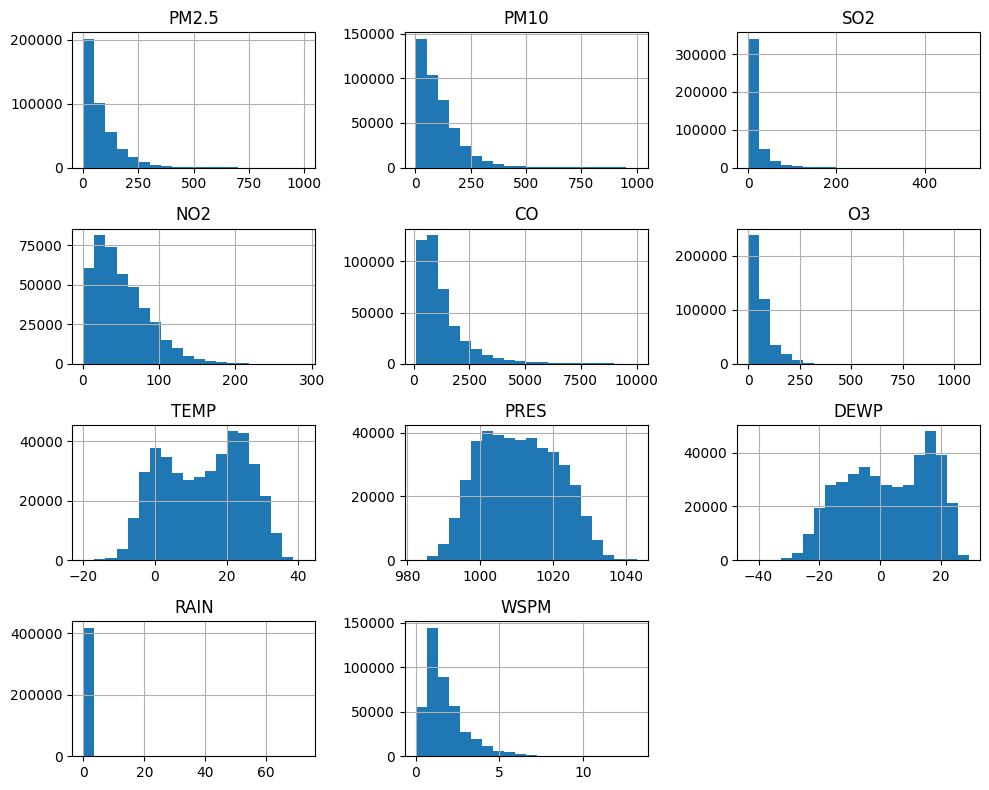

In [13]:
df_interpolated[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

Eksplorasi data numerikal

In [14]:
skewness = df_interpolated.select_dtypes(include=['float64', 'int64']).skew()
print(skewness)

No        0.000000
PM2.5     2.020293
PM10      1.927315
SO2       3.180969
NO2       1.050586
CO        2.631076
O3        1.714738
TEMP     -0.103396
PRES      0.105611
DEWP     -0.186903
RAIN     30.056198
WSPM      1.625930
dtype: float64


Eksplorasi korelasi ( EDA Multivariate ) untuk data non-numerik

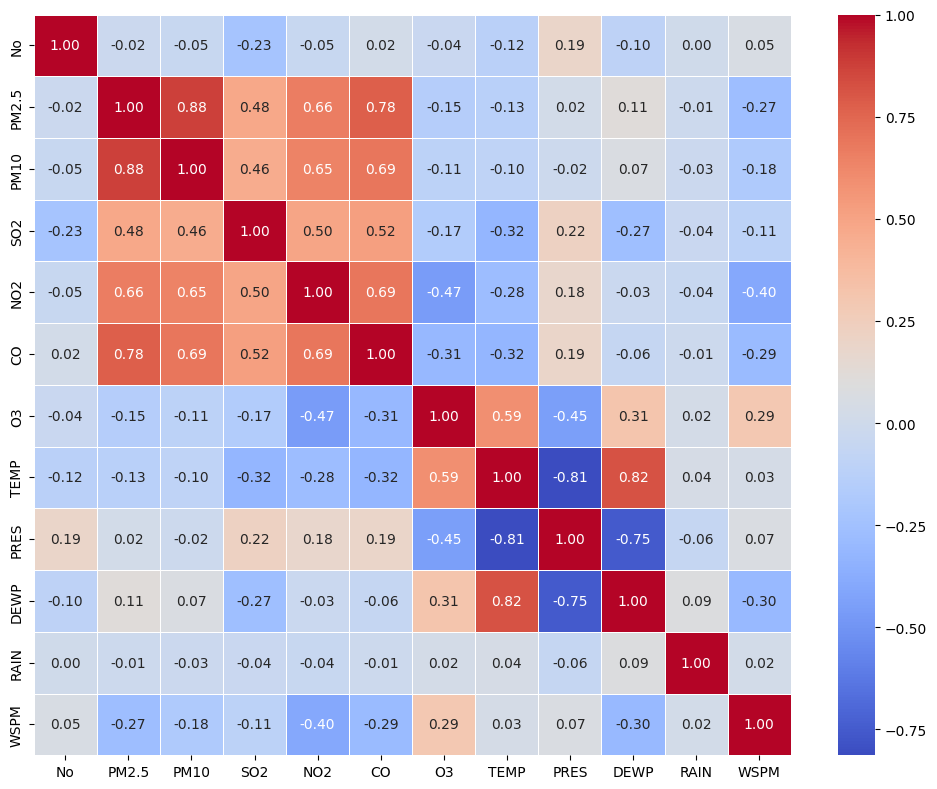

In [17]:
df_numeric = df_interpolated.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.tight_layout()
plt.show()

Distribusi data per stasiun

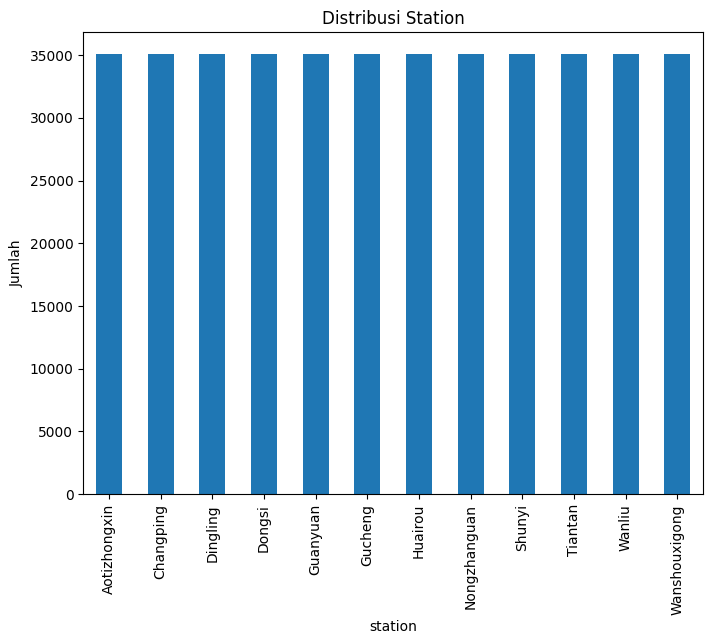

In [19]:
if 'station' in df_interpolated.columns:
    df_interpolated['station'].value_counts().plot(kind='bar', figsize=(8, 6))
    plt.title('Distribusi Station')
    plt.ylabel('Jumlah')
    plt.show()

**Insight:**
- sudah tidak terdapat data yang nilainya null ataupun duplikat
- untuk kolom Rain yang mempunyai Skewness yang tinggi, saya tidak menyesuaikannya karena curah hujan merupakan hal yang alamiah dan mungkin saja hujan turun sangat deras ataupun tidak ada hujan sama sekali
- distribusi data untuk setiap stasiun sudah merata
- PM2.5 - PM10, TEMP - DEWP dan CO - PM2.5 - NO2 memiliki korelasi yang kuat positif
- PRES - TEMP, PRES - DEWP dan O3 - NO2
memiliki korelasi yang kuat negatif
- RAIN dan O3 memiliki korelasi yang lemah antara kolom kolom lain

## Visualization & Explanatory Analysis

### Pertanyaan 1: Dimana tempat dengan kualitas udara terbaik dan terburuk ?

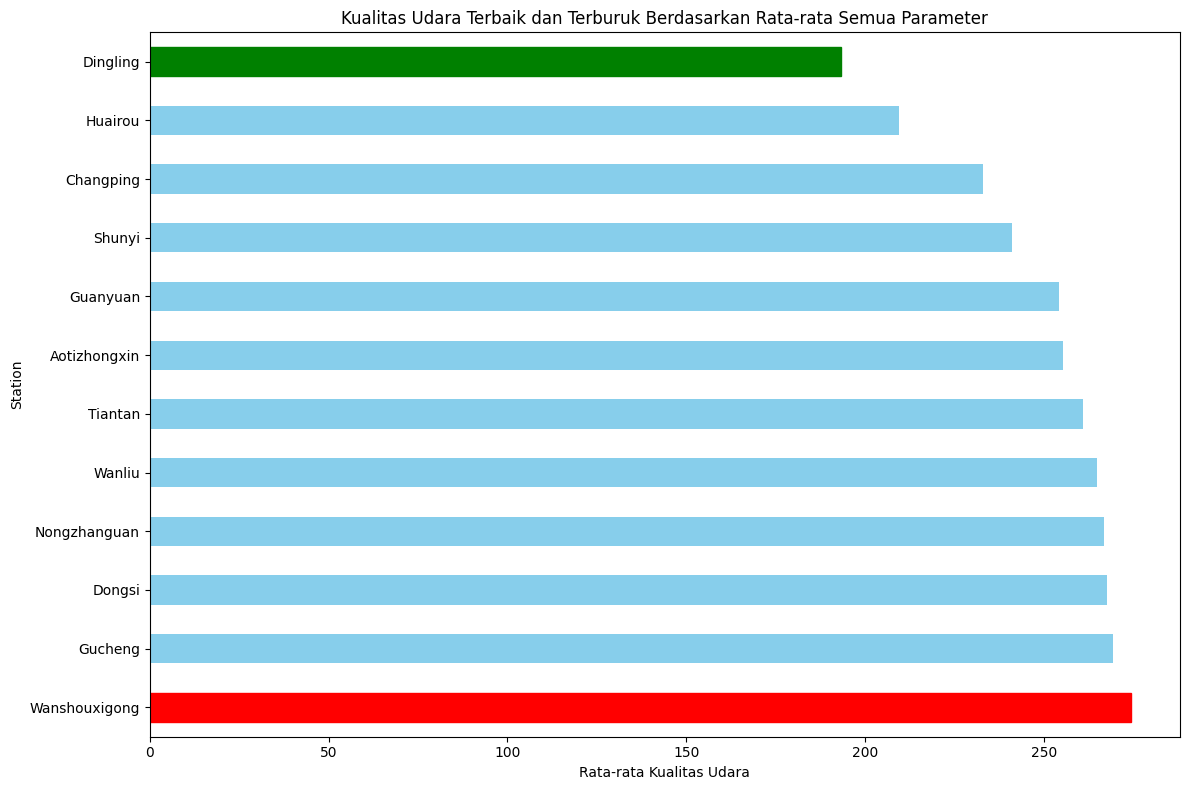

In [ ]:
columns_to_consider = ['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'WSPM']
station_avg = df_interpolated.groupby('station')[columns_to_consider].mean()

station_avg['overall_avg'] = station_avg.mean(axis=1)

station_avg_sorted = station_avg['overall_avg'].sort_values(ascending=False)

best_station = station_avg_sorted.idxmin()
worst_station = station_avg_sorted.idxmax()

plt.figure(figsize=(12, 8))
bar = station_avg_sorted.plot(kind='barh', color='skyblue')

bars = bar.patches

best_station_index = station_avg_sorted.index.get_loc(best_station)
worst_station_index = station_avg_sorted.index.get_loc(worst_station)

bars[best_station_index].set_color('green')
bars[worst_station_index].set_color('red')

plt.title('Kualitas Udara Terbaik dan Terburuk')
plt.ylabel('Station')
plt.xlabel('Rata-rata Kualitas Udara')
plt.tight_layout()

plt.show()

### Pertanyaan 2: Bagaimana Kondisi kualitas udara dari tahun ke tahun ?

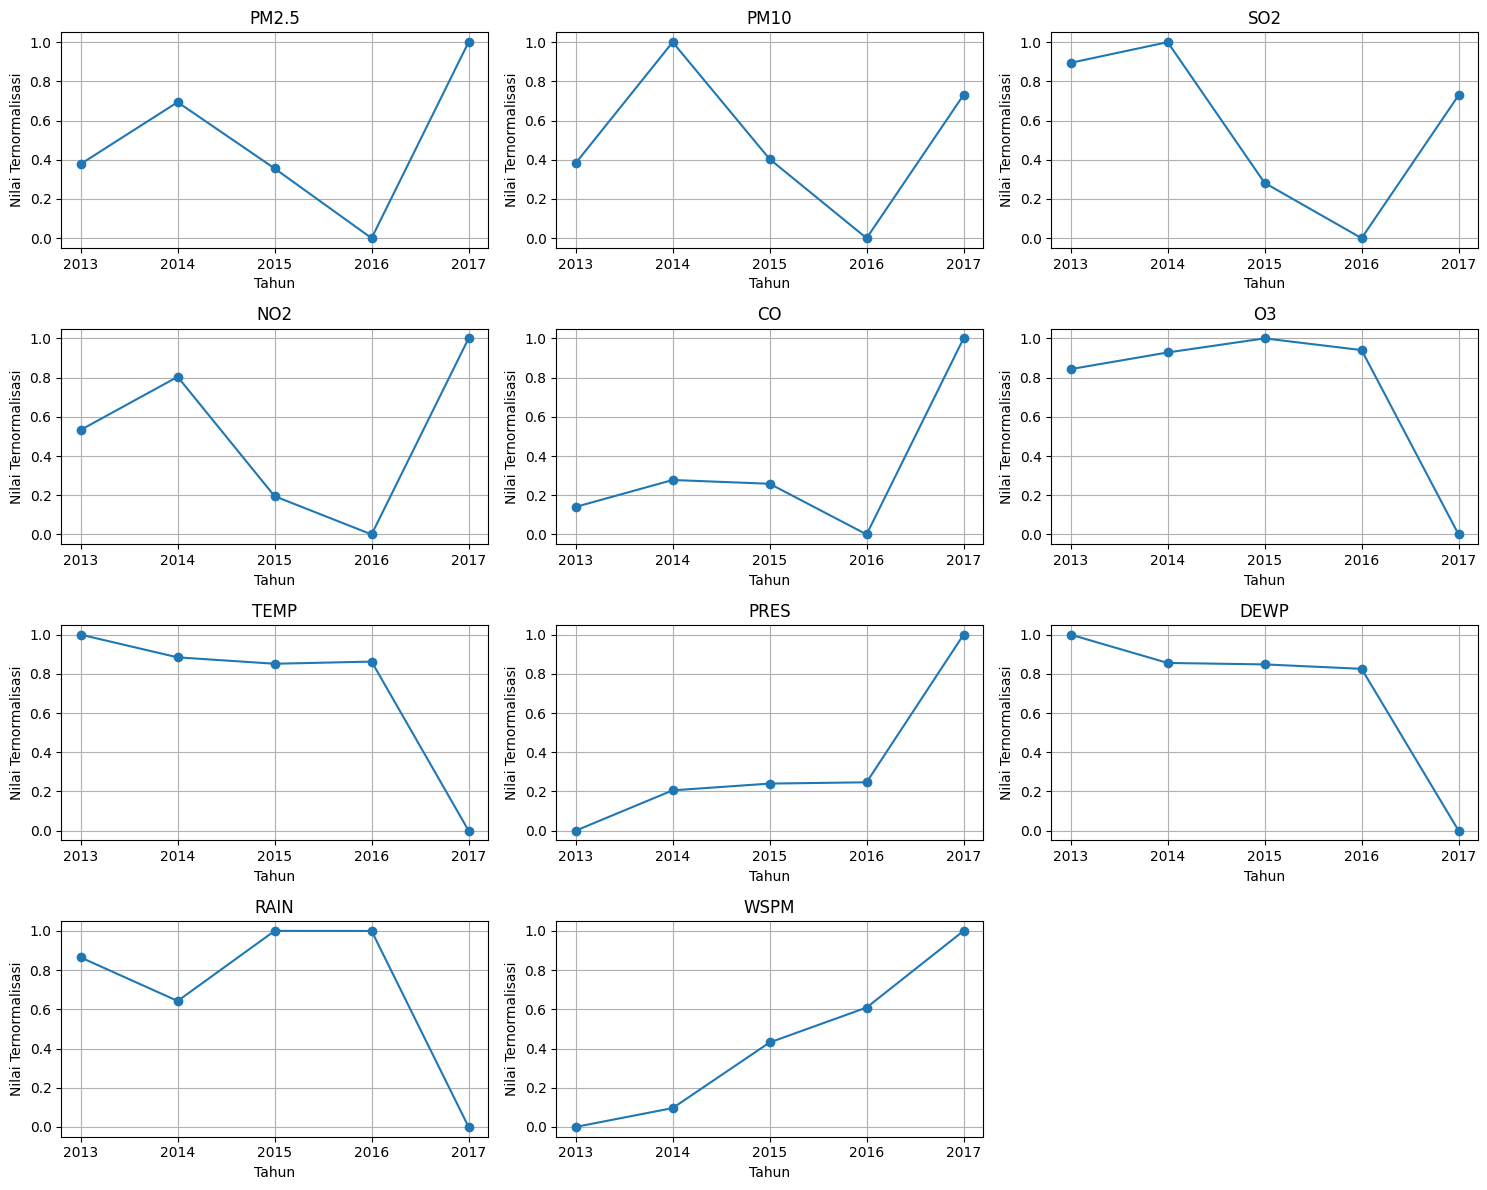

In [ ]:
df_interpolated['date'] = pd.to_datetime(df_interpolated['date'])

df_interpolated['year'] = df_interpolated['date'].dt.year

params = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
yearly_avg = df_interpolated.groupby('year')[params].mean()

yearly_avg_norm = (yearly_avg - yearly_avg.min()) / (yearly_avg.max() - yearly_avg.min())

yearly_avg_norm.index = yearly_avg_norm.index.astype(int)

n_params = len(yearly_avg_norm.columns)
ncols = 3
nrows = int(np.ceil(n_params / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*3))
axes = axes.flatten()

for i, column in enumerate(yearly_avg_norm.columns):
    axes[i].plot(yearly_avg_norm.index, yearly_avg_norm[column], marker='o', linestyle='-')
    axes[i].set_title(column)
    axes[i].set_xlabel('Tahun')
    axes[i].set_ylabel('Nilai Ternormalisasi')
    axes[i].grid(True)
    axes[i].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- untuk pertanyaan yang pertama, yaitu "Dimana tempat dengan kualitas udara terbaik dan terburuk ?" berikut adalah horizontal bar chart yang mengambil rata rata dari semua parameter untuk setiap station dan dibandingkan untuk mencari tempat dengan kualitas udara terbaik dan terburuk
- untuk pertanyaan yang kedua, yaitu "Bagaimana Kondisi kualitas udara dari tahun ke tahun ?" berikut adalah line chart untuk melihat perubahan kualitas udara di setiap tahunya

## Analisis Lanjutan (Opsional)

melihat kategori data PM2.5 dari terendah hingga tertinggi menggunakan binning


Distribusi kategori PM2.5:
PM2.5_category
Sedang           106028
Rendah           105418
Tinggi           104846
Sangat Tinggi    104476
Name: count, dtype: int64


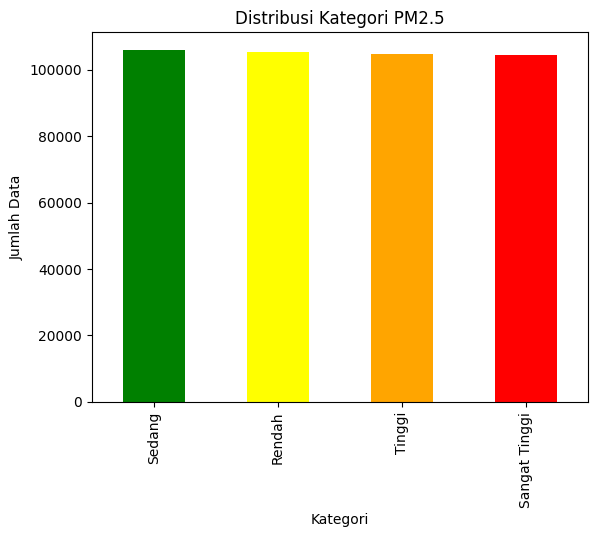

In [22]:
bin_edges = [df_interpolated['PM2.5'].min(), df_interpolated['PM2.5'].quantile(0.25),
             df_interpolated['PM2.5'].quantile(0.5), df_interpolated['PM2.5'].quantile(0.75),
             df_interpolated['PM2.5'].max()]
bin_labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']

df_interpolated['PM2.5_category'] = pd.cut(df_interpolated['PM2.5'], bins=bin_edges, labels=bin_labels, include_lowest=True)

print(df_interpolated['PM2.5_category'].value_counts())

df_interpolated['PM2.5_category'].value_counts().plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Distribusi Kategori PM2.5')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.show()


**insight**
- berikut adalah pengkategorian untuk kolom PM2.5 dari nilai terkecil ke terbesar

## Conclusion

- Dingling merupakan tempat dengan kualitas udara terbaik untuk tahun 2013 sampai 2017
- Wanshouxigong merupakan tempat dengan kualitas udara terburuk untuk tahun 2013 dan 2017
- Kualitas udara cenderung memburuk dari tahun ke tahun, terutama pada tahun 2017, di mana hampir semua polutan utama meningkat.
Tahun 2016 menjadi titik di mana polusi sempat menurun, tetapi tren ini tidak berlanjut pada 2017.
- PM2.5, PM10, NO2, dan CO perlu dipantau lebih ketat, terutama di tahun-tahun dengan peningkatan signifikan.
- Data tambahan mengenai lalu lintas kendaraan, aktivitas industri, dan perubahan iklim diperlukan untuk analisis yang lebih akurat.
Pembaruan data secara berkala akan membantu memahami dampak kebijakan dan efektivitas strategi pengendalian polusi.

